Simple linear regression to model the relationship between two variables.

Explore the relationship between radio promotion budget and sales.

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [7]:
data = pd.read_csv(r"Dummy Data HSS.csv")

# EDA

In [9]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


In [10]:
data.shape

(4572, 5)

In [11]:
data.isna()

,TV,Radio,Social Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4567,False,False,False,False,False
4568,False,False,False,False,False
4569,False,False,False,False,False
4570,False,False,False,False,False


In [12]:
data.isna().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [13]:
data.isna().any(axis=1).sum()

26

In [14]:
data = data.dropna(axis=0)

In [15]:
data.isna().any(axis=1).sum()

0

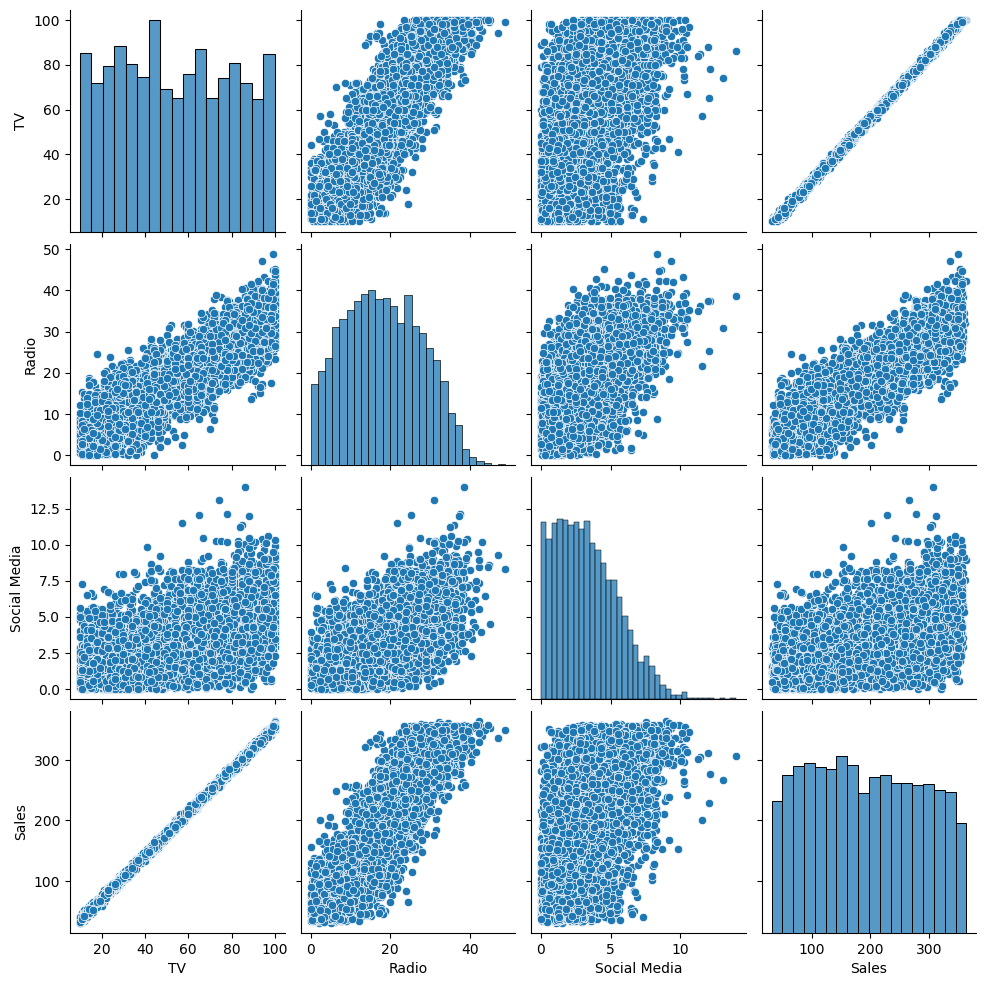

In [17]:
sns.pairplot(data);

# Model Building

In [18]:
ols_data = data[["Radio","Sales"]]

In [19]:
ols_data.head(10)

,Radio,Sales
0,6.566231,54.732757
1,9.237765,46.677897
2,15.886446,150.177829
3,30.020028,298.246340
4,8.437408,56.594181
5,9.614382,105.889148
6,24.893811,198.679825
7,17.355042,108.733932
8,24.648898,270.189400
9,0.431128,48.280582


In [20]:
ols_formula = "Sales ~ Radio"

In [21]:
ols = ols(formula = ols_formula, data = ols_data)

In [22]:
model = ols.fit()

# Results & Evaluation

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.397e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:34:07   Log-Likelihood:                -23864.
No. Observations:                4546   AIC:                         4.773e+04
Df Residuals:                    4544   BIC:                         4.774e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5868      1.455     27.890      0.000      37.734      43.440
Radio          8.3616      0.071    118.184      0.000       8.223       8.500
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.200
Skew:                          -0.006   Prob(JB):                        0.905
Kurtosis:                       3.031   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

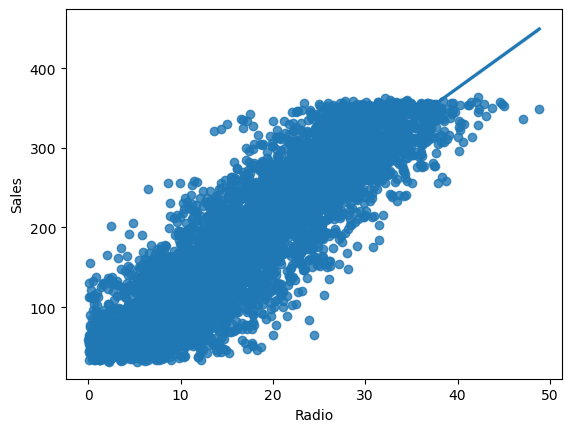

In [25]:
sns.regplot(x = "Radio", y = "Sales", data = ols_data);

In [26]:
residuals = model.resid

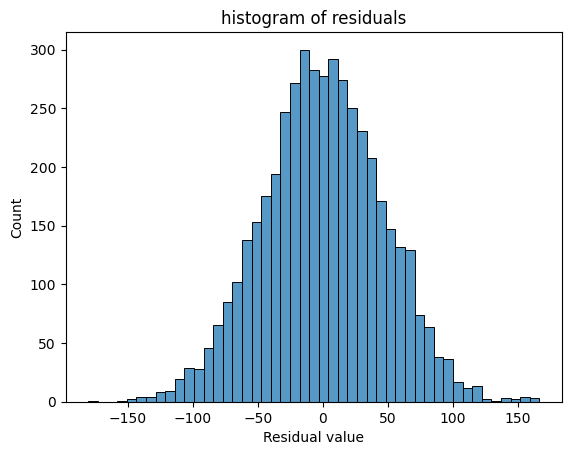

In [27]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual value")
fig.set_title("histogram of residuals")
plt.show()

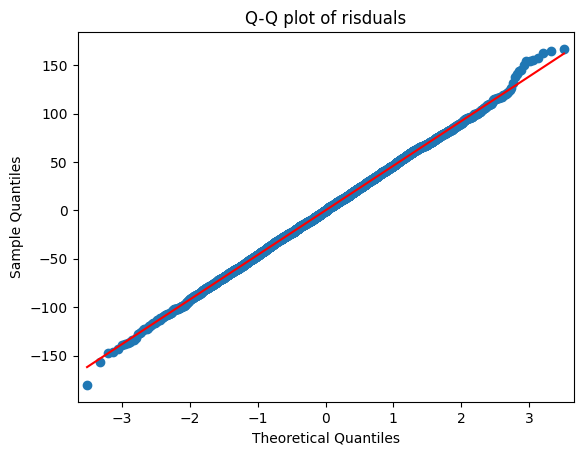

In [28]:
sm.qqplot(residuals, line = "s")
plt.title("Q-Q plot of risduals")
plt.show()

In [29]:
fitted_values = model.predict(ols_data["Radio"])

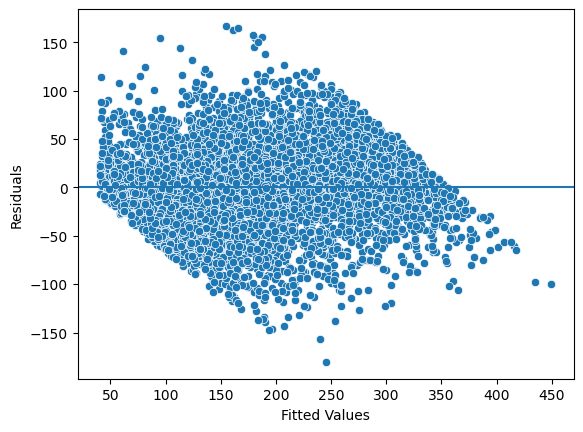

In [30]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()